<a href="https://colab.research.google.com/github/thuvarahan97/DataStorm1.0_TeamFixzels/blob/master/Day2/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd             #to use read_csv(), crosstab()
import numpy as np              #to use exponentiation : exp()
import statsmodels.api as sm    #to use the Logit()
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
#import the dataset
traindatainput = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DataStorm1.0 - Team Fixzels/credit_card_default_train.csv',sep=",")
testdatainput = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DataStorm1.0 - Team Fixzels/credit_card_default_test.csv',sep=",")

In [0]:
traindata, testdata1 = train_test_split(traindatainput, train_size=0.8, test_size=0.2)
# traindata = traindatainput
testdata = testdatainput

In [0]:
traindata.head()

,Client_ID,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
10831,A13538,400K,F,Other,Single,31-45,-1,-1,-1,0,0,-1,9228,14553,35322,20986,13400,15253,14738,35322,420,268,15253,9240,0
14908,A18669,200K,M,Other,Other,Less than 30,0,0,0,0,0,0,18609,13853,12941,14964,12596,5223,3465,3465,2335,2310,2310,2310,1
7897,A9830,1M,F,Graduate,Other,46-65,-2,-2,-2,-2,-2,-2,1795,-7,1783,-18,-18,3987,0,1790,0,0,4006,0,0
5075,A6271,200K,M,Graduate,Single,46-65,0,0,0,0,0,0,57849,61009,63412,44886,45823,46736,4100,4193,1605,1661,1672,1733,0
2164,A2660,100K,M,High School,Other,Less than 30,0,0,0,0,-1,-1,33638,13839,15870,0,6316,0,2590,2310,0,3158,0,0,0


In [0]:
traindata.describe()

,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
count,19200.000000,19200.000000,19200.000000,19200.000000,19200.000000,19200.000000,1.920000e+04,1.920000e+04,1.920000e+04,1.920000e+04,1.920000e+04,1.920000e+04,1.920000e+04,1.920000e+04,1.920000e+04,1.920000e+04,19200.000000,1.920000e+04,19200.000000
mean,-0.010521,-0.129427,-0.158698,-0.215938,-0.261510,-0.290260,1.189963e+05,1.144551e+05,1.095037e+05,1.003954e+05,9.385689e+04,9.027535e+04,1.333991e+04,1.394780e+04,1.217717e+04,1.136083e+04,11197.756042,1.245225e+04,0.223646
std,1.125813,1.199844,1.194712,1.164539,1.129326,1.142427,1.712258e+05,1.657902e+05,1.623658e+05,1.489692e+05,1.419737e+05,1.387761e+05,3.999373e+04,5.955531e+04,4.170083e+04,3.759176e+04,36739.526010,4.388406e+04,0.416698
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-3.824900e+05,-1.611850e+05,-1.420790e+05,-3.927000e+05,-1.878820e+05,-7.844830e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,8.405500e+03,6.975500e+03,6.412250e+03,5.380000e+03,4.110250e+03,2.892500e+03,2.310000e+03,1.936250e+03,9.010000e+02,6.930000e+02,610.000000,3.420000e+02,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.173700e+04,4.915350e+04,4.656050e+04,4.419500e+04,4.199300e+04,3.956450e+04,4.930000e+03,4.675000e+03,4.197000e+03,3.465000e+03,3477.000000,3.465000e+03,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.567970e+05,1.499995e+05,1.411898e+05,1.285898e+05,1.174418e+05,1.145078e+05,1.159600e+04,1.155000e+04,1.058100e+04,9.275500e+03,9411.500000,9.268000e+03,0.000000
max,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,2.228020e+06,2.272881e+06,3.844046e+06,2.059564e+06,2.141765e+06,2.221444e+06,2.017905e+06,3.890638e+06,2.069852e+06,1.434510e+06,965557.000000,1.221218e+06,1.000000


In [0]:
traindata=traindata.replace(['M','F'], [1,-1])
testdata=testdata.replace(['M','F'], [1,-1])
testdata1=testdata1.replace(['M','F'], [1,-1])

In [0]:
pd.to_numeric(traindata['Gender'])

10831   -1
14908    1
7897    -1
5075     1
2164     1
        ..
3413    -1
21154    1
1737    -1
13869    1
3405     1
Name: Gender, Length: 19200, dtype: int64

In [0]:
print(traindata.groupby('EDUCATION_STATUS').count())

                  Client_ID  Balance_Limit_V1  ...  PAID_AMT_DEC  NEXT_MONTH_DEFAULT
EDUCATION_STATUS                               ...                                  
Graduate               6832              6832  ...          6832                6832
High School            3157              3157  ...          3157                3157
Other                  9211              9211  ...          9211                9211

[3 rows x 24 columns]


In [0]:
traindata=traindata.replace(['Graduate','High School','Other'], [2,1,0])
testdata=testdata.replace(['Graduate','High School','Other'], [2,1,0])
testdata1=testdata1.replace(['Graduate','High School','Other'], [2,1,0])

In [0]:
pd.to_numeric(traindata['EDUCATION_STATUS'])

10831    0
14908    0
7897     2
5075     2
2164     1
        ..
3413     0
21154    1
1737     0
13869    2
3405     0
Name: EDUCATION_STATUS, Length: 19200, dtype: int64

In [0]:
print(traindata.groupby('MARITAL_STATUS').count())

                Client_ID  Balance_Limit_V1  ...  PAID_AMT_DEC  NEXT_MONTH_DEFAULT
MARITAL_STATUS                               ...                                  
0                   10500             10500  ...         10500               10500
Single               8700              8700  ...          8700                8700

[2 rows x 24 columns]


In [0]:
traindata=traindata.replace(['Single'], [1])
testdata=testdata.replace(['Single'], [1])
testdata1=testdata1.replace(['Single'], [1])

In [0]:
pd.to_numeric(traindata['EDUCATION_STATUS'])

10831    0
14908    0
7897     2
5075     2
2164     1
        ..
3413     0
21154    1
1737     0
13869    2
3405     0
Name: EDUCATION_STATUS, Length: 19200, dtype: int64

In [0]:
print(traindata.groupby('AGE').count())

              Client_ID  Balance_Limit_V1  ...  PAID_AMT_DEC  NEXT_MONTH_DEFAULT
AGE                                        ...                                  
31-45              9648              9648  ...          9648                9648
46-65              3329              3329  ...          3329                3329
Less than 30       6152              6152  ...          6152                6152
More than 65         71                71  ...            71                  71

[4 rows x 24 columns]


In [0]:
traindata['AGE']=traindata['AGE'].replace(['Less than 30','31-45','46-65','More than 65'], [1,2,3,4])
testdata['AGE']=testdata['AGE'].replace(['Less than 30','31-45','46-65','More than 65'], [1,2,3,4])
testdata1['AGE']=testdata1['AGE'].replace(['Less than 30','31-45','46-65','More than 65'], [1,2,3,4])

In [0]:
traindata['Balance_Limit_V1'] = traindata['Balance_Limit_V1'].map(lambda x : float(x[0:-1])*1000 if (x[-1]=='K') else float(x[0:-1])*1000000)
testdata['Balance_Limit_V1'] = testdata['Balance_Limit_V1'].map(lambda x : float(x[0:-1])*1000 if (x[-1]=='K') else float(x[0:-1])*1000000)
testdata1['Balance_Limit_V1'] = testdata1['Balance_Limit_V1'].map(lambda x : float(x[0:-1])*1000 if (x[-1]=='K') else float(x[0:-1])*1000000)

In [0]:
pd.to_numeric(traindata['Balance_Limit_V1'])

10831     400000.0
14908     200000.0
7897     1000000.0
5075      200000.0
2164      100000.0
           ...    
3413      500000.0
21154    1000000.0
1737      200000.0
13869     500000.0
3405      300000.0
Name: Balance_Limit_V1, Length: 19200, dtype: float64

In [0]:
print(traindata.groupby('NEXT_MONTH_DEFAULT').count())

                    Client_ID  Balance_Limit_V1  ...  PAID_AMT_NOV  PAID_AMT_DEC
NEXT_MONTH_DEFAULT                               ...                            
0                       14906             14906  ...         14906         14906
1                        4294              4294  ...          4294          4294

[2 rows x 24 columns]


In [0]:
testdata[testdata.columns[12:24]]=testdata[testdata.columns[12:24]]/traindata.max()[traindata.columns[12:24]]
testdata1[testdata1.columns[12:24]]=testdata1[testdata.columns[12:24]]/traindata.max()[traindata.columns[12:24]]
traindata[traindata.columns[12:24]]=traindata[traindata.columns[12:24]]/traindata.max()[traindata.columns[12:24]]

In [0]:
testdata['Balance_Limit_V1']=testdata['Balance_Limit_V1']/traindata.max()['Balance_Limit_V1']
testdata1['Balance_Limit_V1']=testdata1['Balance_Limit_V1']/traindata.max()['Balance_Limit_V1']
traindata['Balance_Limit_V1']=traindata['Balance_Limit_V1']/traindata.max()['Balance_Limit_V1']

In [0]:
traindata['BIAS']=1
testdata['BIAS']=1
testdata1['BIAS']=1

In [0]:
independentVar= ['Balance_Limit_V1',
                 'Gender',
                 'EDUCATION_STATUS',
                 'MARITAL_STATUS',
                 'AGE',
                 'PAY_JULY','PAY_AUG','PAY_SEP','PAY_OCT','PAY_NOV','PAY_DEC',
                 'DUE_AMT_JULY','DUE_AMT_AUG','DUE_AMT_SEP','DUE_AMT_OCT','DUE_AMT_NOV','DUE_AMT_DEC',
                 'PAID_AMT_JULY','PAID_AMT_AUG','PAID_AMT_SEP','PAID_AMT_OCT','PAID_AMT_NOV','PAID_AMT_DEC','BIAS']

In [0]:
X_train, y_train = traindata[independentVar], traindata['NEXT_MONTH_DEFAULT']
X_test1, y_test1 = testdata1[independentVar], testdata1['NEXT_MONTH_DEFAULT']
X_test = testdata[independentVar]

In [0]:
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from keras.models import Sequential
from keras.layers import Dense

In [0]:
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=0.4)
# fit and apply the transform
X_train_res, y_train_res = under.fit_resample(X_train, y_train)

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train_res, y_train_res.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
# define the keras model
model = Sequential()
model.add(Dense(128, input_dim=24, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [132]:
# fit the keras model on the dataset
history = model.fit(X_train_res, y_train_res, epochs=50)

Epoch 1/50
21470/21470 [==============================] - 4s 183us/step - loss: 0.5851 - acc: 0.6971
Epoch 2/50
21470/21470 [==============================] - 3s 145us/step - loss: 0.5721 - acc: 0.7067
Epoch 3/50
21470/21470 [==============================] - 3s 158us/step - loss: 0.5626 - acc: 0.7101
Epoch 4/50
21470/21470 [==============================] - 3s 162us/step - loss: 0.5575 - acc: 0.7133
Epoch 5/50
21470/21470 [==============================] - 3s 156us/step - loss: 0.5501 - acc: 0.7179
Epoch 6/50
21470/21470 [==============================] - 3s 149us/step - loss: 0.5451 - acc: 0.7201
Epoch 7/50
21470/21470 [==============================] - 3s 151us/step - loss: 0.5396 - acc: 0.7241
Epoch 8/50
21470/21470 [==============================] - 3s 149us/step - loss: 0.5321 - acc: 0.7301
Epoch 9/50
21470/21470 [==============================] - 3s 146us/step - loss: 0.5261 - acc: 0.7332
Epoch 10/50
21470/21470 [==============================] - 3s 150us/step - loss: 0.5179 - a

In [0]:
# make probability predictions with the model
y_pred = model.predict(X_test)

# round predictions
y_pred_rounded = [round(x[0]) for x in y_pred]

In [134]:
count_0 = 0
count_1 = 0

for val in y_pred_rounded:
  if val == 0:
    count_0 += 1
  elif val == 1:
    count_1 += 1

print (count_0, count_1)

4258 1742


In [0]:
# make probability predictions with the model
y_pred1 = model.predict(X_test1)

# round predictions
y_pred_rounded1 = [round(x[0]) for x in y_pred1]

In [136]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test1, y_pred_rounded1)
print(confusion_matrix)

[[2959  805]
 [ 503  533]]


In [137]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred_rounded1))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      3764
           1       0.40      0.51      0.45      1036

    accuracy                           0.73      4800
   macro avg       0.63      0.65      0.63      4800
weighted avg       0.76      0.73      0.74      4800



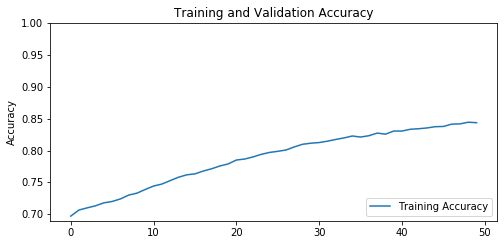

In [138]:
acc = history.history['acc']
# val_acc = history.history['val_acc']

loss = history.history['loss']
# val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
# plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.show()